In [53]:
store = []
filename1 = "therm_test_hb_wh.txt"
with open(filename1,"r") as file:
    for line in file:
        store.append(line)

In [54]:
filename2 = "therm_test_hb_wh(2).txt"
with open(filename2,"w") as file:
    for line in store:
        sp = line.split()
        if len(sp)==2:
            file.write(f"{sp[0]}\t{sp[1]}\n")

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('therm_test_hb_h.txt',header= None,sep='\t')
print(data.shape)
data = data.to_numpy()

(2100000, 2)


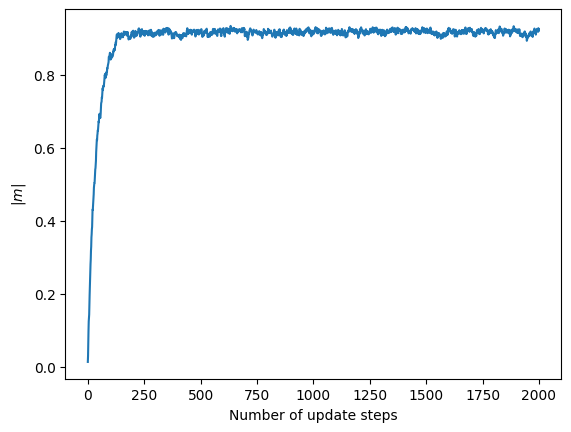

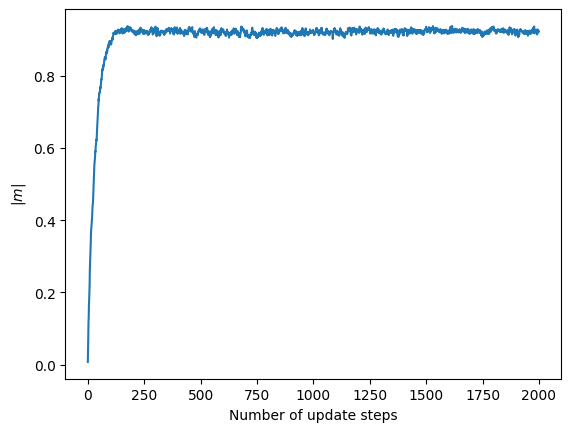

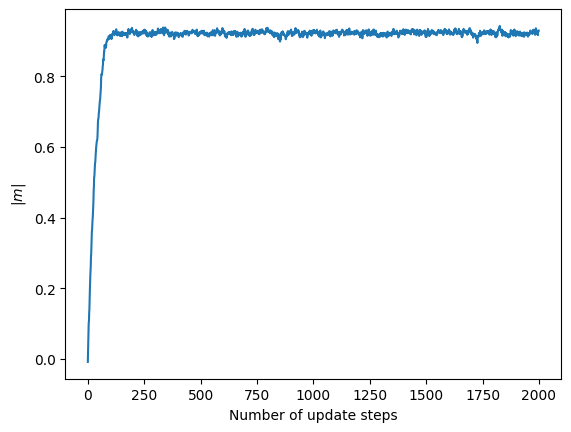

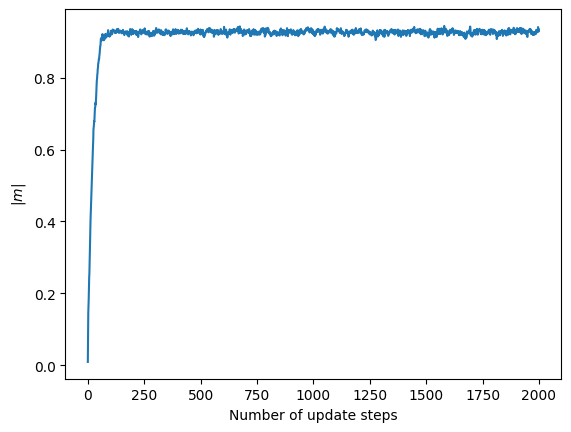

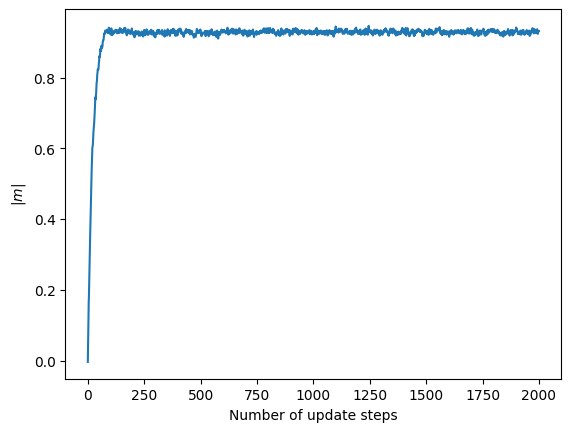

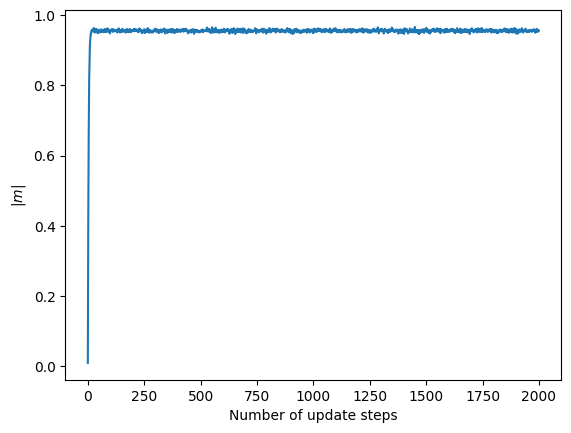

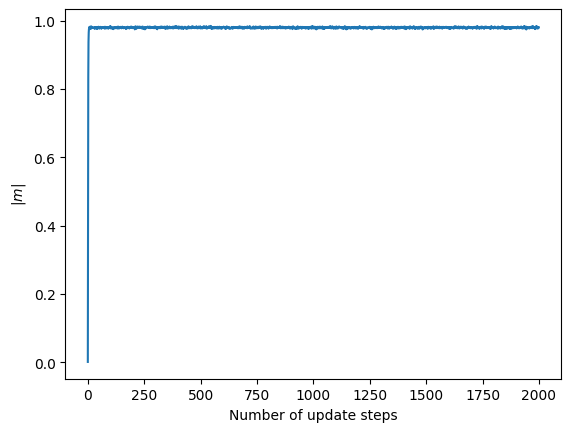

In [20]:
# Hier werden die Thermalisierungskurven geplottet die im Vorherigen Abschnitt geladen wurden.

b = np.array([1.22*i/40 for i in range(40)])
beta = np.zeros(7)
beta[0] = 0.3
beta[1] = 0.46
beta[2] = 0.49
beta[3] = 0.53
beta[4] = 0.6
beta[5] = 0.7
beta[6] = 0.8

# die stepsize bezeichnet die Anzahl an sweeps über die jeweils gemittelt wird
stepsize = 1
# Anzahl an Iterationen pro Temperatur muss hier eingestellt werden
N = 100000
# mit Fr können Sie den Ausschnitt bestimmen der geplottet wird
Fr = 2000
mh = 0
b= 1

h_f = np.array([0.04,0.05,0.06,0.07,0.08,0.3,0.85])
steps = np.arange(int(Fr/stepsize))
steps2 = np.arange(20000)
for i in range(7):
    if i==0:
        fig, ax = plt.subplots(1,1)
        ax.plot(steps[::b],data[i*N+mh*7*N:N*mh*7+i*N+Fr:b,1]/128**2)
        
    elif i==1:
        fig, ax = plt.subplots(1,1)
        ax.plot(steps,data[i*N:i*N+Fr,1]/128**2)
    else:
        fig, ax = plt.subplots(1,1)
        ax.plot(steps[::b],data[i*N+mh*7*N:mh*N*7+i*N+Fr:b,1]/128**2)
    ax.set_xlabel("Number of update steps")
    ax.set_ylabel(r"$|m|$")
    # plt.savefig("hb_h_{}.png".format(int(h_f[i]*100)))
    plt.show()





#### Hier wurde die Hysterese geplottet

(27, 2)


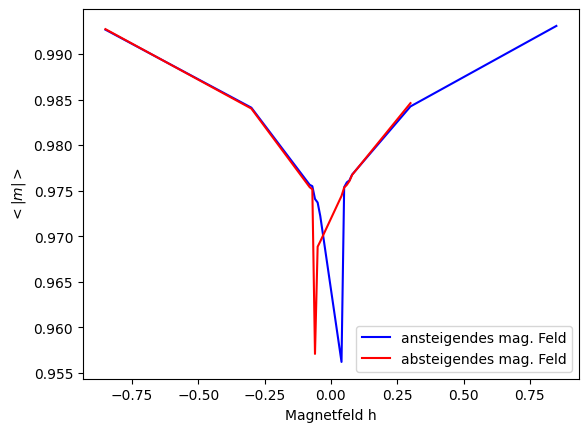

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('short_results4b.txt',header= None,sep='\t')
# data.head()
data = data.to_numpy()
print(data.shape)
b = np.array([1.22*i/35 for i in range(35)])
b1 = np.array([-0.85,-0.3,-0.08,-0.07,-0.06,-0.05,-0.04,0.04,0.05,0.06,0.07,0.08,0.3,0.85])

# Rückwärtrichtung
dat2 = data[14:,1]
fig2, ax2 = plt.subplots(1,1)
# there 
ax2.plot(b1,data[:14,1]/128**2,color='blue')
# and back again
ax2.plot(b1[:-1],dat2[::-1]/128**2,color='red')
# ax2.plot(b[:-1],data[-1:34:-1,1]/32**2)
ax2.set_xlabel("Magnetfeld h")
ax2.set_ylabel(r"$<|m|>$")
ax2.legend(["ansteigendes mag. Feld","absteigendes mag. Feld"],loc='lower right')
plt.show()

#### Hier können die Magnetisierungskurven geplottet werden.

(35, 2)


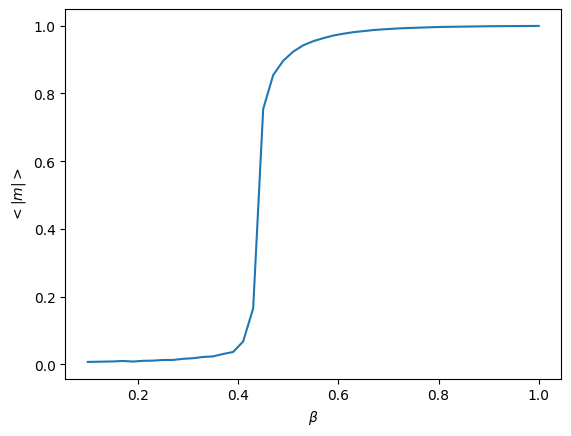

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data3 = pd.read_csv('short_results4a_4.txt',header= None,sep='\t')
data3 = data3.to_numpy()
data=data3
print(data.shape)
b = np.array([1.22*i/35 for i in range(35)])
beta = np.zeros(35)
for i in range(30):
    beta[i+2]= 0.15 +0.6/30*i
for i in range(2):
    beta[i] = 0.1+0.04*i
for i in range(3):
    beta[i+32]= 0.8+ 0.1*i



fig2, ax2 = plt.subplots(1,1)
ax2.plot(beta[:],data[:,1]/128**2)
ax2.set_xlabel(r"$\beta$")
ax2.set_ylabel(r"$<|m|>$")
plt.show()

